In [1]:
%pip install matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the columns as they appear in your CSV files
cols = ['Rows1', 'Cols1', 'Rows2', 'Cols2', 'Time']

# Load GPU data
try:
    df_gpu = pd.read_csv('cudaTime.csv', names=cols, header=None)
    df_cpu = pd.read_csv('cpuTime.csv', names=cols, header=None)
except FileNotFoundError:
    print("Error: Make sure cudaTime.csv and cpuTime.csv are in the same folder.")

# Merge using all four dimension columns
# We suffix the time columns to distinguish them
df = pd.merge(
    df_gpu, 
    df_cpu, 
    on=['Rows1', 'Cols1', 'Rows2', 'Cols2'], 
    suffixes=('_GPU', '_CPU')
)

# Create a readable label for the x-axis (e.g., "512x512")
df['SizeLabel'] = df['Rows1'].astype(str) + "x" + df['Cols2'].astype(str)
df['Time_GPU'] = pd.to_numeric(df['Time_GPU'], errors='coerce')
df['Time_CPU'] = pd.to_numeric(df['Time_CPU'], errors='coerce')
print("Data successfully merged. First 5 rows:")
print(df[['SizeLabel', 'Time_GPU', 'Time_CPU']].head())

Data successfully merged. First 5 rows:
     SizeLabel   Time_GPU     Time_CPU
0  Rows1xCols2        NaN          NaN
1        50x50     0.2301       0.0006
2      500x500     2.9036       0.2250
3    5000x5000  1143.8884  937538.0083


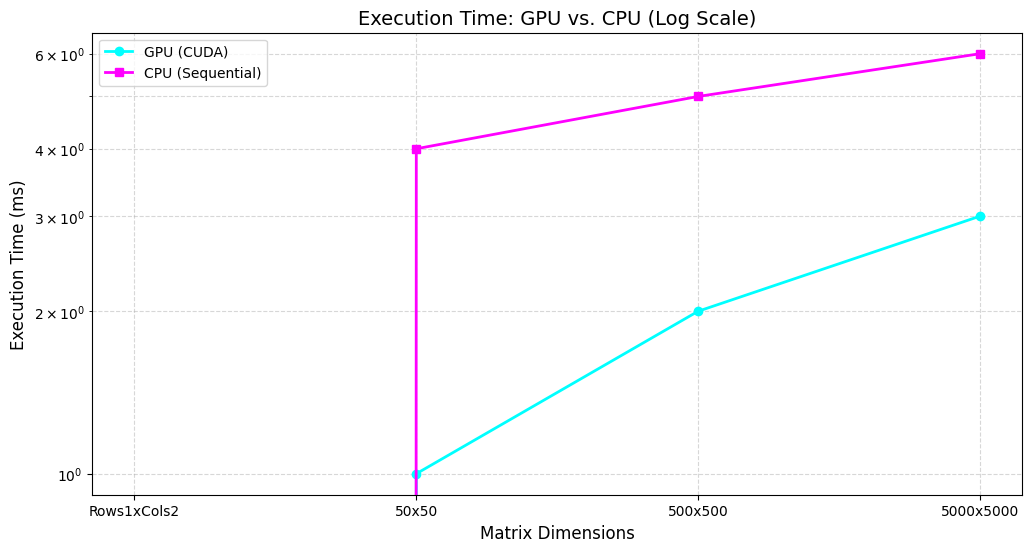

In [3]:
plt.figure(figsize=(12, 6))

# Plotting the lines
plt.plot(df['SizeLabel'], df['Time_GPU'], marker='o', color='cyan', label='GPU (CUDA)', linewidth=2)
plt.plot(df['SizeLabel'], df['Time_CPU'], marker='s', color='magenta', label='CPU (Sequential)', linewidth=2)

# Graph styling
plt.yscale('log') # Logarithmic scale is essential for performance gaps
plt.title('Execution Time: GPU vs. CPU (Log Scale)', fontsize=14)
plt.xlabel('Matrix Dimensions', fontsize=12)
plt.ylabel('Execution Time (ms)', fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()

plt.show()

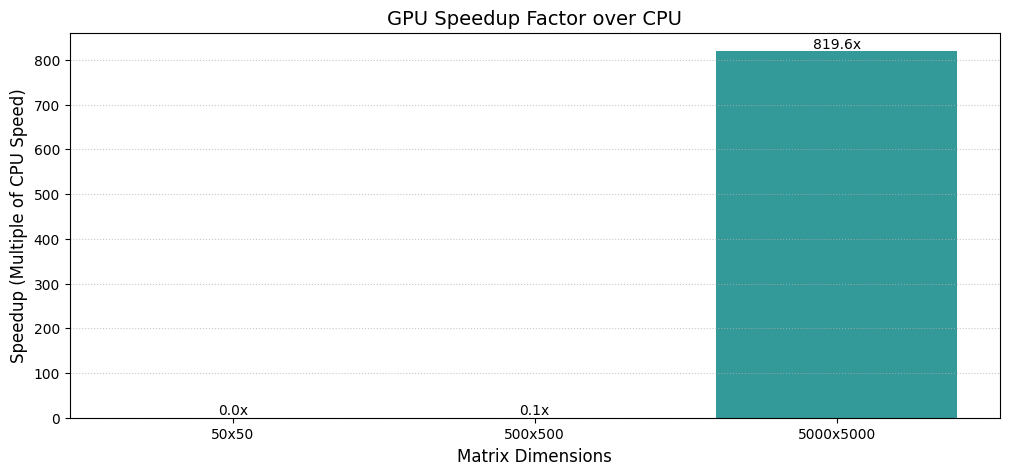

In [6]:
# Calculate speedup
df['Speedup'] = df['Time_CPU'] / df['Time_GPU']

plt.figure(figsize=(12, 5))
bars = plt.bar(df['SizeLabel'], df['Speedup'], color='teal', alpha=0.8)

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.1f}x', ha='center', va='bottom', fontsize=10)

plt.title('GPU Speedup Factor over CPU', fontsize=14)
plt.xlabel('Matrix Dimensions', fontsize=12)
plt.ylabel('Speedup (Multiple of CPU Speed)', fontsize=12)
plt.grid(axis='y', linestyle=':', alpha=0.7)

plt.show()